# Data Preprocessing, general setup in Python
Summary
*   Get access to the dataset
*   Importing Libraries
*   Importing the dataset
*   Handle missing data
*   Encode categorical values
*   Splitting the dataset
*   Scale features
*   Hopefully getting all preprocessing right at this stage to use the data in ML

In [238]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [239]:
# Importing the dataset
df = pd.read_csv('Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [241]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [242]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# Using Imputer-class from scikit-learn to fill out missing data
the preprocessing library from scikit-learn obviously maps out
a set of modules specialized for doing just that, preprocess data :)

In [197]:
# Taking care of missing data
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',
                  strategy='mean',
                  axis=0)
# imputer = imputer.fit(X[:, 1:3])         # Only columns with missing data, 2nd and 3rd column
# X[:, 1:3] = imputer.transform(X[:, 1:3]) # Only columns with missing data, 2nd adn 3rd column
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])

In [198]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

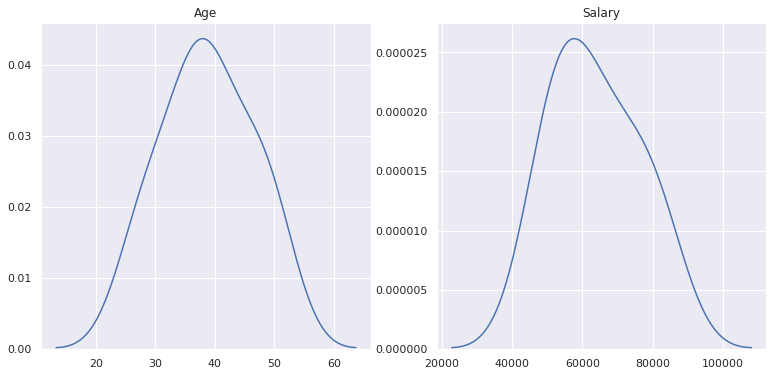

In [262]:
fig, ax = plt.subplots(1,2, figsize=(13,6))
k1 = sns.kdeplot(X[:,1], ax=ax[0])
k1.set(title="Age")
k1 = sns.kdeplot(X[:,2], ax=ax[1])
k1.set(title="Salary")
plt.show()

# Encoding categorical data
Appplying OneHotEncoder transform on categorical data column via ColumnTransformer, the algorithm takes care of integer labeling of the categories

In [199]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#transformers : list of tuples
#    List of (name, transformer, column(s)) tuples specifying the
#    transformer objects to be applied to subsets of the data.

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [0])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough',                        # Leave the rest of the columns untouched
    n_jobs=8                                        # Always nice to have access to some parallelism
)

X = np.array(ct.fit_transform(X), dtype=np.float) # Convert to an array of floats

In [200]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [201]:
# Just prints the array in a compact integer fashion to have a quick overview
# the array holds floats only for consistency and efficency throughout the ML-process
for i in range(len(X)):
    print(list(map(int,X[i])))

[1, 0, 0, 44, 72000]
[0, 0, 1, 27, 48000]
[0, 1, 0, 30, 54000]
[0, 0, 1, 38, 61000]
[0, 1, 0, 40, 63777]
[1, 0, 0, 35, 58000]
[0, 0, 1, 38, 52000]
[1, 0, 0, 48, 79000]
[0, 1, 0, 50, 83000]
[1, 0, 0, 37, 67000]


### Target variable enconding

In [202]:
from sklearn.preprocessing import LabelEncoder

#The LabelEncoder tranforms categorical values to integer values and stores the information within the object

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

[0 1 0 0 1 1 0 1 0 1]


In [205]:
print(y)
print(labelencoder_y.inverse_transform(y))

[0 1 0 0 1 1 0 1 0 1]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### Splitting the data into train and test using model_selection module in Sci-Kit Learn

In [226]:
# diffrent versions
# from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

In [227]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y,
                                                      test_size=0.2,
                                                      random_state=42)

In [229]:
X_train.shape

(8, 5)

In [230]:
type(X_train)

numpy.ndarray

In [232]:
X_test.shape

(2, 5)

# Feature Scaling
Just taking care of the order of number representation to match the same scale

In [233]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [234]:
X_train

array([[ 1.        , -0.57735027, -0.57735027, -0.7529426 , -0.62603778],
       [ 1.        , -0.57735027, -0.57735027,  1.00845381,  1.01304295],
       [ 1.        , -0.57735027, -0.57735027,  1.79129666,  1.83258331],
       [-1.        ,  1.73205081, -0.57735027, -1.73149616, -1.09434656],
       [ 1.        , -0.57735027, -0.57735027, -0.36152118,  0.42765698],
       [-1.        ,  1.73205081, -0.57735027,  0.22561096,  0.05040824],
       [-1.        , -0.57735027,  1.73205081, -0.16581046, -0.27480619],
       [-1.        , -0.57735027,  1.73205081, -0.01359102, -1.32850095]])

In [235]:
X_test

array([[-1.        ,  1.73205081, -0.57735027,  2.18271808,  2.30089209],
       [-1.        , -0.57735027,  1.73205081, -2.3186283 , -1.79680973]])

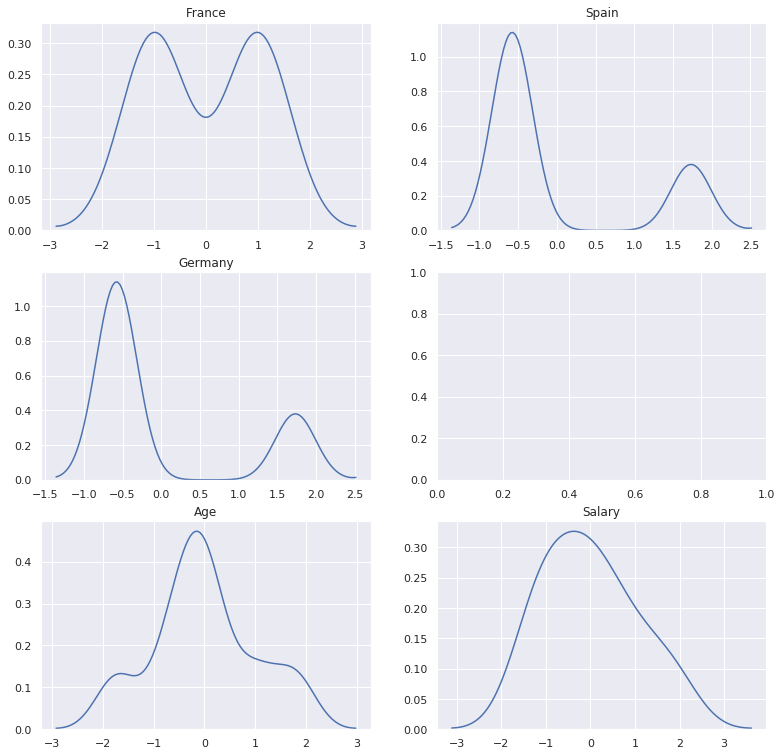

In [289]:
fig, ax = plt.subplots(3,2, figsize=(13,13))
k1 = sns.kdeplot(np.concatenate((X_train,X_train))[:,0], ax=ax[0,0])
k1.set(title="France")
k1 = sns.kdeplot(np.concatenate((X_train,X_train))[:,1], ax=ax[0,1])
k1.set(title="Spain")
k1 = sns.kdeplot(np.concatenate((X_train,X_train))[:,2], ax=ax[1,0])
k1.set(title="Germany")
k1 = sns.kdeplot(np.concatenate((X_train,X_train))[:,3], ax=ax[2,0])
k1.set(title="Age")
k1 = sns.kdeplot(np.concatenate((X_train,X_train))[:,4], ax=ax[2,1])
k1.set(title="Salary")
plt.show()